In [1]:
from utils import *

import matplotlib.pyplot as plt 

In [2]:
db_models, benchmarks = load_database()
cacheasso_benchmarks = benchmarks['cacheasso_benchmarks']
cachesize_benchmarks = benchmarks['cachesize_benchmarks_small']
tlb_benchmarks = benchmarks['tlb_benchmarks']
singleperf = benchmarks['singleperf_benchmarks']
execution_times = benchmarks['execution_times']

In [3]:
csv_dict = load_csv()

[-]  Loading target data from CSV
[-]  Done loading target data from CSV


### Cache Sizes

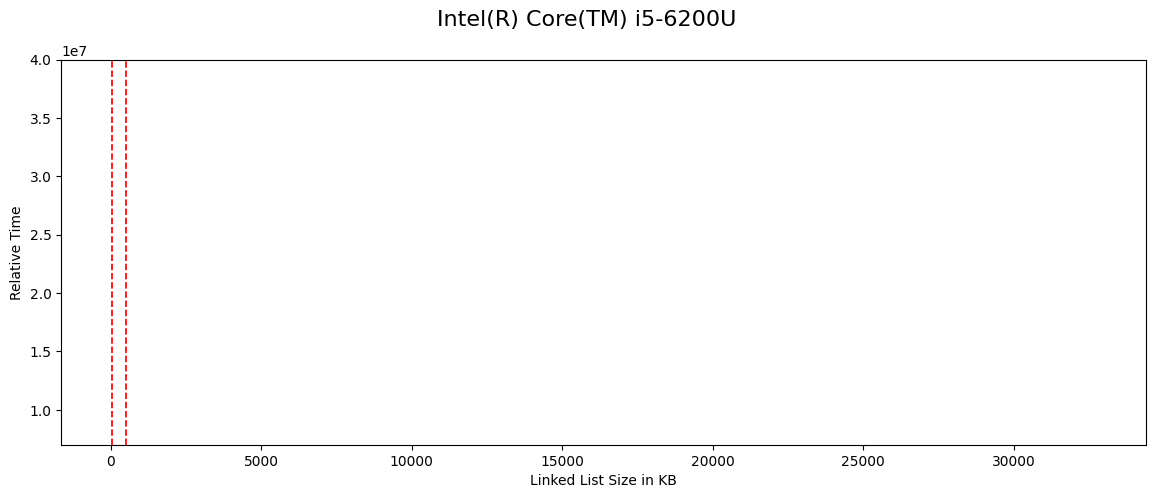

In [6]:
for i, model in enumerate(db_models):
    if "i5-6200U" in model:
        fig, ax1 = plt.subplots(figsize=(14, 5))
        fig.suptitle(model, fontsize=16)

        ax1.set_ylim([7000000, 40000000])
        ax1.set_xlabel("Linked List Size in KB")
        ax1.set_ylabel("Relative Time")
        X, Y = [], []
        for d in cachesize_benchmarks[i]:
            X += [d['x'] / 1024]
            Y += [d['y']]
        for line in [32, 512]:
            ax1.axvline(line, color='red', ls='--', lw=1.25)
        ax1.plot(X, Y)
        break

### L1 Cache Associativity

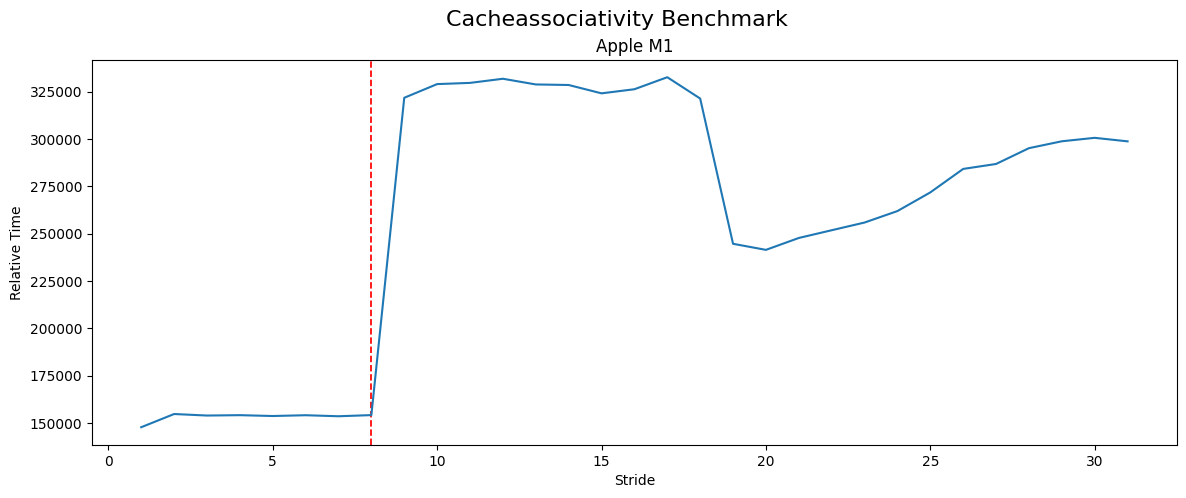

In [7]:
fig, ax = plt.subplots(figsize=(14, 5))
fig.suptitle("Cacheassociativity Benchmark", fontsize=16)

# Apple M1
model = db_models[81]
ax.set_title(model)
ax.set_xlabel("Stride")
ax.set_ylabel("Relative Time")
X, Y = [], []
for d in cacheasso_benchmarks[81]:
    X += [d['x']]
    Y += [d['y']]
ax.axvline(8, color='red', ls='--', lw=1.25)
ax.plot(X, Y)

### TLB Size

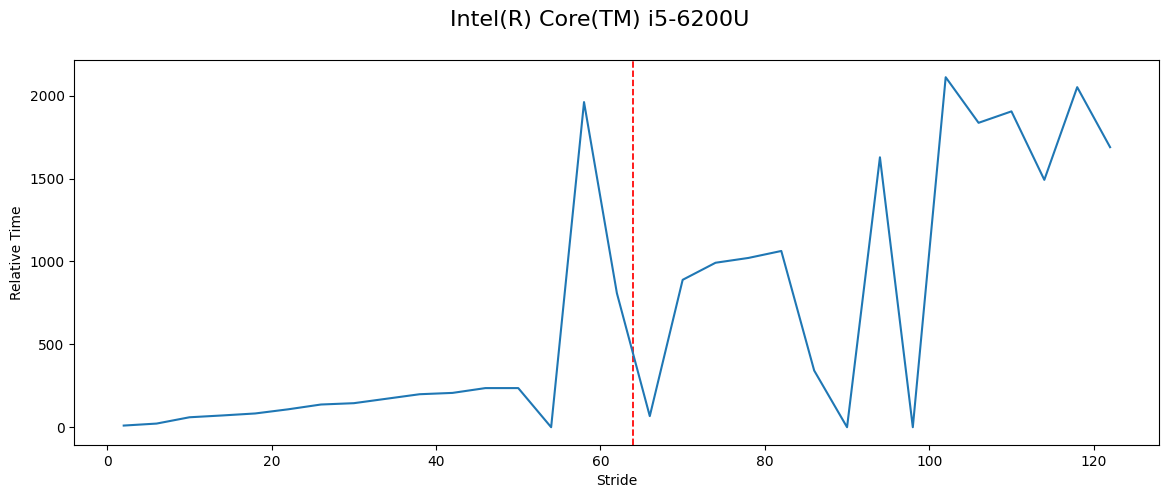

In [9]:
for i, model in enumerate(db_models):
    if "i5-6200U" in model:
        fig, ax = plt.subplots(figsize=(14, 5))
        fig.suptitle(model, fontsize=16)
        
        ax.set_xlabel("Stride")
        ax.set_ylabel("Relative Time")
        X, Y = [], []
        for d in tlb_benchmarks[i]:
            X += [d['x']]
            Y += [d['y']]
        ax.axvline(64, color='red', ls='--', lw=1.25)
        ax.plot(X, Y)
        break

### Single-Core Performance

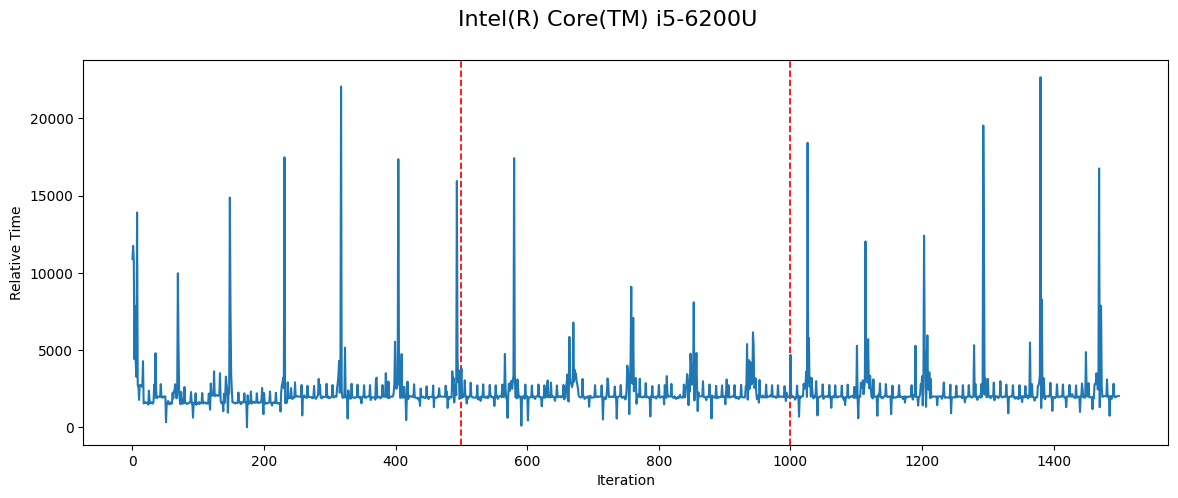

In [10]:
for i, model in enumerate(db_models):
    if "i5-6200U" in model:
        fig, ax = plt.subplots(figsize=(14, 5))
        fig.suptitle(model, fontsize=16)
        
        ax.set_xlabel("Iteration")
        ax.set_ylabel("Relative Time")
        X, Y = [], []
        for d in singleperf[i]:
            X += [d['x']]
            Y += [d['y']]
        ax.axvline(500, color='red', ls='--', lw=1.25)
        ax.axvline(1000, color='red', ls='--', lw=1.25)
        ax.plot(X, Y)
        break